## Classifying newwires - Multiclass Classification

In [1]:
from tensorflow.keras.datasets import reuters

### Loading Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

C:\Users\Amar Ismail\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Amar Ismail\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Preparing the data

In [6]:
import numpy as np

In [7]:
from tensorflow.keras.utils import to_categorical

#x_train = to_categorical(train_data, dtype='float32')
#x_test = to_categorical(test_data dtype='float32')

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[10]

array([0., 1., 0., ..., 0., 0., 0.])

### Model Definition

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

### Compiling the model

In [25]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### setting aside a validation set

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


### Training the model

In [27]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size =512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 303ms/step - loss: 3.3473 - accuracy: 0.4557 - val_loss: 2.8140 - val_accuracy: 0.4990
Epoch 2/20
16/16 [==============================] - 4s 276ms/step - loss: 2.3001 - accuracy: 0.4460 - val_loss: 1.9312 - val_accuracy: 0.5140
Epoch 3/20
16/16 [==============================] - 4s 278ms/step - loss: 1.4302 - accuracy: 0.7097 - val_loss: 1.2781 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 5s 284ms/step - loss: 0.9650 - accuracy: 0.8103 - val_loss: 1.1575 - val_accuracy: 0.7490
Epoch 5/20
16/16 [==============================] - 4s 276ms/step - loss: 0.7564 - accuracy: 0.8478 - val_loss: 1.0065 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 4s 267ms/step - loss: 0.6199 - accuracy: 0.8760 - val_loss: 0.9900 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 4s 271ms/step - loss: 0.5107 - accuracy: 0.8995 - val_loss: 0.9285 - val_accuracy: 0.8030
Epoch 

### Plotting the training and validation loss

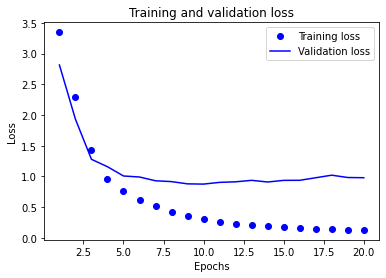

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

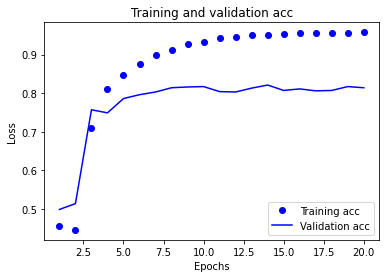

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Retraining a model from scratch

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 7s 443ms/step - loss: 2.5490 - accuracy: 0.5306 - val_loss: 1.6623 - val_accuracy: 0.6550
Epoch 2/9
16/16 [==============================] - 4s 258ms/step - loss: 1.3896 - accuracy: 0.7114 - val_loss: 1.2672 - val_accuracy: 0.7320
Epoch 3/9
16/16 [==============================] - 4s 257ms/step - loss: 1.0313 - accuracy: 0.7790 - val_loss: 1.1236 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 4s 265ms/step - loss: 0.8135 - accuracy: 0.8311 - val_loss: 1.0204 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 4s 253ms/step - loss: 0.6466 - accuracy: 0.8670 - val_loss: 0.9597 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 4s 251ms/step - loss: 0.5131 - accuracy: 0.8960 - val_loss: 0.9191 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 4s 269ms/step - loss: 0.4186 - accuracy: 0.9146 - val_loss: 0.9012 - val_accuracy: 0.8180
Epoch 8/9
16/

In [33]:
results

[0.9759010672569275, 0.7876224517822266]